In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data_dir = "/home/x245zhou/verify-c-common/data"
base_data = pd.read_csv(f"{data_dir}/store_map_stats.csv")
store_map_data = pd.read_csv(f"{data_dir}/store_map_stats_horn-hybrid-compress-stores.csv")

In [4]:
base_data.head(10)

,job_name,result,bmc_circuit_size,bmc_dag_size,bmc_time,bmc_solve_time,hybrid_smap_new,hybrid_smap_insert,hybrid_smap_hit,hybrid_smap_miss,...,hybrid_selects,hybrid_stores,hybrid_ptr_norm,hybrid_eager_rw_ite,hybrid_row,hybrid_smap_find_hit,hybrid_smap_find_miss,opsem_simp_time,seahorn_total_time,loop_size
0,bvAn,True,8,2250,0.35,0.01,NaN,NaN,NaN,NaN,...,4848,476,0.0,0.28,99924,NaN,NaN,0.01,0.53,10
1,bvAn,True,8,2575,0.43,0.01,NaN,NaN,NaN,NaN,...,6868,524,0.0,0.33,111812,NaN,NaN,0.01,0.65,15
2,bvAn,True,8,2800,0.46,0.01,NaN,NaN,NaN,NaN,...,8888,556,0.0,0.35,120164,NaN,NaN,0.02,0.73,20
3,bvAn,True,8,3110,0.50,0.01,NaN,NaN,NaN,NaN,...,10912,608,0.0,0.38,134836,NaN,NaN,0.02,0.83,25
4,bvAn,True,8,3325,0.58,0.01,NaN,NaN,NaN,NaN,...,12960,640,0.0,0.43,144516,NaN,NaN,0.02,0.95,30
5,bvAn,True,8,3620,0.59,0.01,NaN,NaN,NaN,NaN,...,15020,688,0.0,0.43,160596,NaN,NaN,0.02,1.03,35
6,bvAn,True,8,3825,0.64,0.01,NaN,NaN,NaN,NaN,...,17080,720,0.0,0.45,171476,NaN,NaN,0.02,1.10,40
7,bvAn,True,8,4105,0.74,0.01,NaN,NaN,NaN,NaN,...,19140,768,0.0,0.52,189556,NaN,NaN,0.03,1.27,45
8,bvAn,True,8,4199,0.79,0.01,NaN,NaN,NaN,NaN,...,21204,800,0.0,0.56,201636,NaN,NaN,0.03,1.39,50
9,bvAn,True,8,4464,0.88,0.01,NaN,NaN,NaN,NaN,...,23260,848,0.0,0.62,221716,NaN,NaN,0.03,1.54,55


Text(0, 0.5, 'Time (s)')

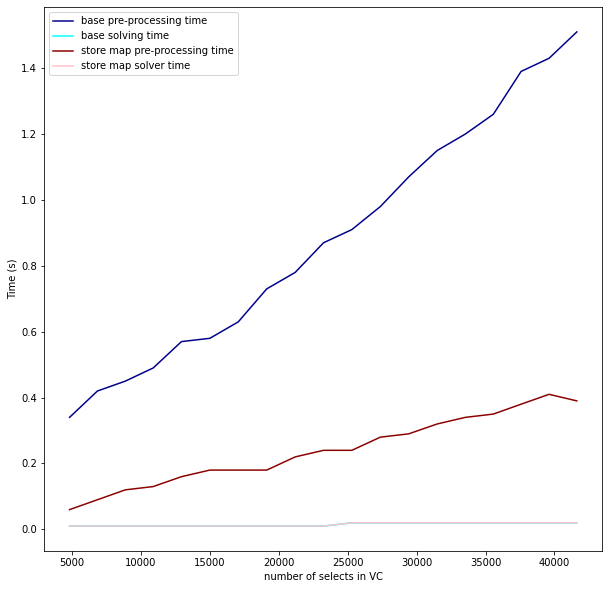

In [5]:
base_data['bmc_non_solver_time'] = base_data['bmc_time'] - base_data['bmc_solve_time']
store_map_data['bmc_non_solver_time'] = store_map_data['bmc_time'] - store_map_data['bmc_solve_time']

# base_data.index.name("number of selects in VC")
ax = base_data.plot(x='hybrid_selects', y='bmc_non_solver_time', color='DarkBlue', label='base pre-processing time', figsize=(10, 10))
# ax.set(xlabel="number of selects in VC", ylabel="Time(s)") 
base_data.plot(x='hybrid_selects', y='bmc_solve_time', color='cyan', label='base solving time', ax=ax)
store_map_data.plot(x='hybrid_selects', y='bmc_non_solver_time', color='DarkRed', label='store map pre-processing time', ax=ax)
store_map_data.plot(x='hybrid_selects', y='bmc_solve_time', color='pink', label='store map solver time', ax=ax)
plt.xlabel('number of selects in VC')
plt.ylabel('Time (s)')


In [6]:
store_map_data[["hybrid_smap_find_hit", "hybrid_smap_find_miss"]]

,hybrid_smap_find_hit,hybrid_smap_find_miss
0,360,116
1,396,128
2,420,136
3,459,149
4,485,155
5,526,162
6,555,165
7,596,172
8,626,174
9,669,179


<AxesSubplot:xlabel='hybrid_selects'>

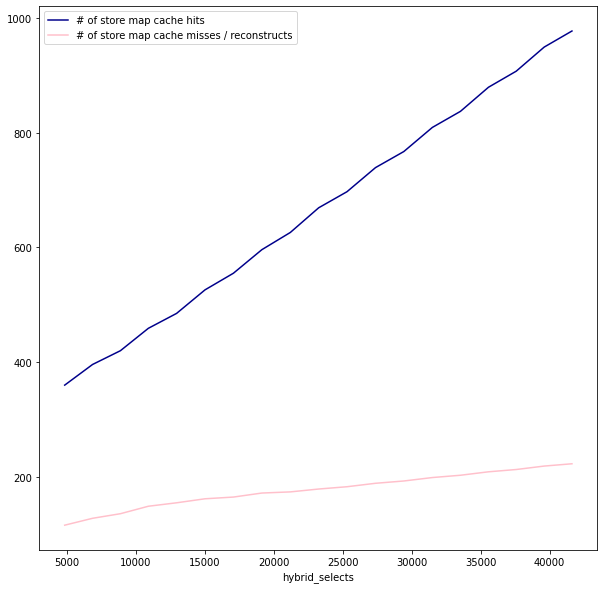

In [60]:
ax = store_map_data.plot(x='hybrid_selects', y='hybrid_smap_find_hit', color='DarkBlue', label='# of store map cache hits', figsize=(10, 10))
store_map_data.plot(x='hybrid_selects', y='hybrid_smap_find_miss', color='pink', label='# of store map cache misses / reconstructs', ax=ax)


In [61]:
sv_lambdas = pd.read_csv(f'{data_dir}/svcomp_base.brunch.csv')
sv_hybrid = pd.read_csv(f'{data_dir}/svcomp_horn-bv2-lambdas_false_horn-hybrid-array_horn-based-ptr-obj.brunch.csv')
sv_hybrid_stmap = pd.read_csv(f'{data_dir}/svcomp_horn-bv2-lambdas_false_horn-hybrid-array_horn-based-ptr-obj_horn-hybrid-compress-stores.brunch.csv')

In [62]:
sv_hybrid.head(9)

,job_name,result,bmc_circuit_size,bmc_dag_size,bmc_time,bmc_solve_time,hybrid_smap_new,hybrid_smap_insert,hybrid_smap_hit,hybrid_smap_miss,...,hybrid_selects,hybrid_stores,hybrid_ptr_norm,hybrid_eager_rw_ite,hybrid_row,hybrid_smap_find_hit,hybrid_smap_find_miss,opsem_simp_time,seahorn_total_time,loop_size
0,sv_comp_bAnd2,True,8,2664,3.74,0.02,NaN,NaN,NaN,NaN,...,3192,1608,0.00,3.60,968800,NaN,NaN,0.05,4.85,NaN
1,sv_comp_mapavg,True,8,2873,3.77,0.00,NaN,NaN,NaN,NaN,...,3196,1608,0.00,3.65,968800,NaN,NaN,0.05,4.91,NaN
2,sv_comp_mapsum,True,8,2667,3.79,0.01,NaN,NaN,NaN,NaN,...,3196,1608,0.00,3.66,968800,NaN,NaN,0.05,4.93,NaN
3,sv_comp_bOr,True,8,2664,4.01,0.02,NaN,NaN,NaN,NaN,...,3192,1608,0.00,3.86,968800,NaN,NaN,0.05,5.17,NaN
4,sv_comp_xor,True,8,2664,6.45,2.60,NaN,NaN,NaN,NaN,...,3192,1608,0.00,3.71,968800,NaN,NaN,0.05,7.53,NaN
5,sv_comp_bAnd,True,8,2800,0.55,0.01,NaN,NaN,NaN,NaN,...,8888,556,0.00,0.42,120164,NaN,NaN,0.02,0.91,NaN
6,sv_comp_mapsum2,True,8,7067,23.37,0.01,NaN,NaN,NaN,NaN,...,7996,4008,0.01,23.04,6022000,NaN,NaN,0.13,29.94,NaN
7,sv_comp_mapavg2,True,8,7575,23.31,0.00,NaN,NaN,NaN,NaN,...,7996,4008,0.01,22.99,6022000,NaN,NaN,0.13,30.11,NaN
8,sv_comp_bOr2,True,8,7063,23.30,0.03,NaN,NaN,NaN,NaN,...,7992,4008,0.01,22.95,6022000,NaN,NaN,0.13,30.09,NaN


In [63]:
sv_lambdas["bmc_pp_time"] = sv_lambdas["bmc_time"] - sv_lambdas["bmc_solve_time"]
sv_hybrid["bmc_pp_time"] = sv_hybrid["bmc_time"] - sv_hybrid["bmc_solve_time"]
sv_hybrid_stmap["bmc_pp_time"] = sv_hybrid_stmap["bmc_time"] - sv_hybrid_stmap["bmc_solve_time"]

In [64]:
sv_lambdas_summ = sv_lambdas[["bmc_pp_time", "bmc_solve_time", "bmc_dag_size"]].agg(["sum"]).astype(int)
sv_lambdas_summ["config"] = "lambdas"
sv_hyb_summ = sv_hybrid[["bmc_pp_time", "bmc_solve_time", "bmc_dag_size"]].agg(["sum"]).astype(int)
sv_hyb_summ["config"] = "theory of memory"
sv_hyb_stm_summ = sv_hybrid_stmap[["bmc_pp_time", "bmc_solve_time", "bmc_dag_size"]].agg(["sum"]).astype(int)
sv_hyb_stm_summ["config"] = "theory of memory w/ store map"

In [65]:
tab = pd.concat([sv_lambdas_summ, sv_hyb_summ, sv_hyb_stm_summ])
tab

,bmc_pp_time,bmc_solve_time,bmc_dag_size,config
sum,266,0,8982,lambdas
sum,113,22,45100,theory of memory
sum,4,22,45100,theory of memory w/ store map


## Breakdown of time per task

Text(0, 0.5, 'Time (s)')

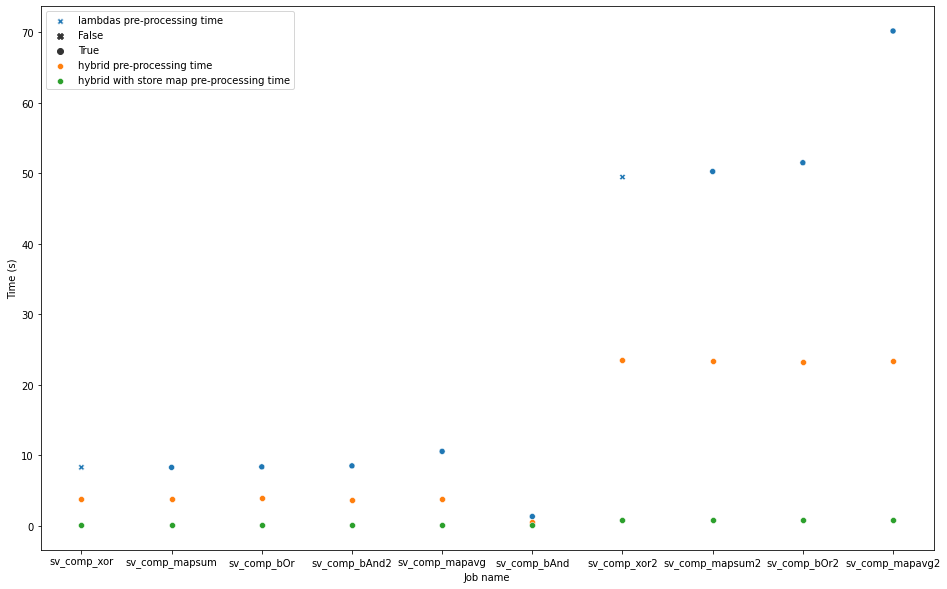

In [66]:
fig, ax = plt.subplots(figsize=(16, 10))

sns.scatterplot(data=sv_lambdas, x="job_name", y="bmc_pp_time", label='lambdas pre-processing time', style='result', markers=['X', 'o'],ax=ax)
sns.scatterplot(data=sv_hybrid, x="job_name", y="bmc_pp_time", label='hybrid pre-processing time', ax=ax)
sns.scatterplot(data=sv_hybrid_stmap, x="job_name", y="bmc_pp_time", label='hybrid with store map pre-processing time', ax=ax)
plt.xlabel('Job name')
plt.ylabel('Time (s)')

Text(0, 0.5, 'Time (s)')

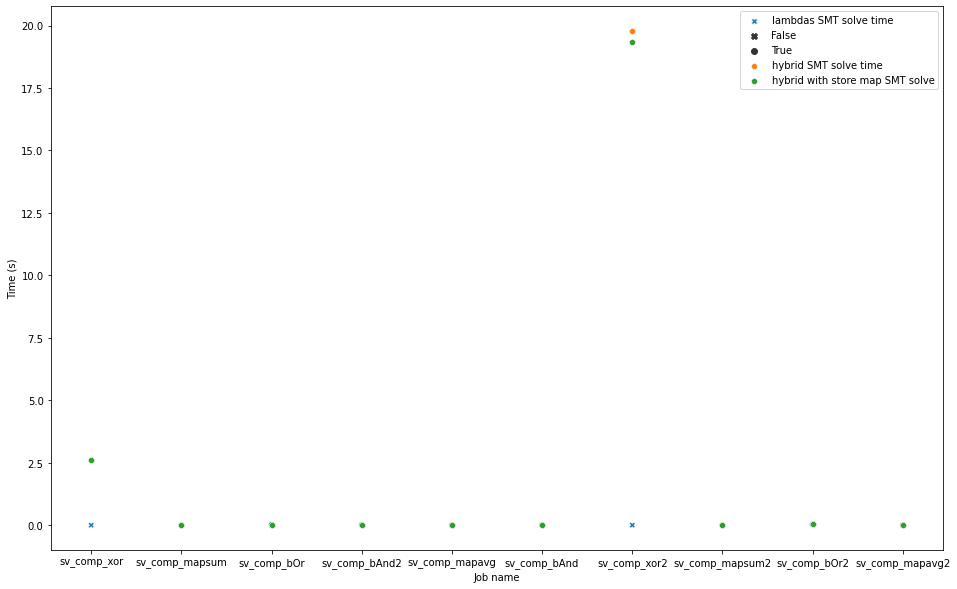

In [67]:
fig, ax = plt.subplots(figsize=(16, 10))

sns.scatterplot(data=sv_lambdas, x="job_name", y="bmc_solve_time", label='lambdas SMT solve time', style='result', markers=['X', 'o'],ax=ax)
sns.scatterplot(data=sv_hybrid, x="job_name", y="bmc_solve_time", label='hybrid SMT solve time', ax=ax)
sns.scatterplot(data=sv_hybrid_stmap, x="job_name", y="bmc_solve_time", label='hybrid with store map SMT solve', ax=ax)
plt.xlabel('Job name')
plt.ylabel('Time (s)')